In [1]:
from cgi import test
from math import exp, sqrt, pi
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Build function for creating a Normal (Gaussain) distribution function
def normal_dist(x, mean, stdev):
    prob_density = 1/sqrt(2*pi)/stdev*exp(-pow(x-mean,2)/2/stdev/stdev)
    # prob_density = pi*stdev*exp(-0.5*((x-mean)/stdev)**2)
    return prob_density

In [3]:
# independent features with gaussian distrobution (14 features)
features = ["Wine type","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
            "Total phenols", "Flavanoids", "Non Flavanoid phenols", "Proanthocyanins",
            "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

In [4]:
# Read .csv file  
wineDataSet = pd.read_csv('Wine.csv', header=None)


In [5]:
# Find the number of different wines in the data set
sets_of_wine = [0,0,0]
for i in range(wineDataSet.shape[0]):
    sets_of_wine[int(wineDataSet[0].values[i])-1]+=1
    

In [6]:
# Wine 1: 1-59, Wine 2: 60-130, Wine 3: 131-178
print(sets_of_wine)

[59, 71, 48]


In [7]:
wine1 = wineDataSet.iloc[               :sets_of_wine[0]                ,:]
wine2 = wineDataSet.iloc[sets_of_wine[0]:sets_of_wine[0]+sets_of_wine[1],:]
wine3 = wineDataSet.iloc[sets_of_wine[0]+sets_of_wine[1]:               ,:]

In [8]:
# Split the wine dataset according to its label 
wine1_test = wine1.sample(n=18)
wine1_train = wine1.drop(wine1_test.index)
wine2_test = wine2.sample(n=18)
wine2_train = wine2.drop(wine2_test.index)
wine3_test = wine3.sample(n=18)
wine3_train = wine3.drop(wine3_test.index)

In [9]:
# Build train and test sets 
train_data = pd.concat([wine1_train, wine2_train, wine3_train])
test_data = pd.concat([wine1_test, wine2_test, wine3_test])

In [10]:
# Instance and its label
print(train_data.shape)
print(test_data.shape)

(124, 14)
(54, 14)


In [11]:
# Save as csv file
train_data.to_csv('train.csv')
test_data.to_csv('test.csv')

In [12]:
# Find the number of different wines in the training set
sets_of_wine = [0,0,0]
for i in range(train_data.shape[0]):
    sets_of_wine[train_data[0].values[i]-1]+=1

In [13]:
# Calculate mean and standard deviation of each feature of different wine. 
# Stored as [mean_feature1, stdev_feature1], ... (13 for each wine)
feature_distri = []
data_accum = 0
for i in range(3):
    for j in range(13):
        # calculate mean and stdev for train_data[0:sets_of_wine[i]][j+1]
        mean  = np.average(train_data[j+1].values[data_accum:data_accum+sets_of_wine[i]])
        stdev = np.std(train_data[j+1].values[data_accum:data_accum+sets_of_wine[i]])
        feature_distri.append([mean,stdev])
    data_accum += sets_of_wine[i]

In [14]:
# Calculate prior for each wine
priors = [0,0,0]
train_total = sets_of_wine[0]+sets_of_wine[1]+sets_of_wine[2]
for i in range(3):
    priors[i] = sets_of_wine[i]/train_total

In [15]:
# Calculate the MAP for all test data
wine_posterior = [0,0,0]
correctly_labeled = 0
prediction = []

for i in range(test_data.shape[0]):
    for j in range(3):
        posterior = 1
        for k in range(13):
            posterior *= normal_dist(test_data[k+1].values[i], feature_distri[13*j+k][0], feature_distri[13*j+k][1])
        posterior *= priors[j]
        wine_posterior[j] = posterior
    # print(wine_posterior)  
    prediction.append(wine_posterior.index(max(wine_posterior))+1)
    if prediction[i] == test_data[0].values[i]:
        correctly_labeled+=1

In [16]:
print('accuracy percent: {:.2%}'.format(correctly_labeled/test_data.shape[0]))
print(prediction, len(prediction))

accuracy percent: 98.15%
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3] 54


In [17]:
# Show results with sklearn.decomposition.PCA function
test_data_no_label = test_data.iloc[: , 1:]
labels = test_data[0].tolist()
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [18]:
features = ["Wine type","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
            "Total phenols", "Flavanoids", "Non Flavanoid phenols", "Proanthocyanins",
            "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

df = pd.read_csv('Wine.csv', names=features, header=0)

In [19]:
df.head()


,Wine type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non Flavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Wine type                     177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Non Flavanoid phenols         177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [21]:
df.isnull().sum()

Wine type                       0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Non Flavanoid phenols           0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [22]:
# Using the standard scaler method to get the values converted into integers between -3 and +3.
X = df.iloc[:, 1:14].values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [23]:
X.shape

(177, 13)

# 2D Principal Component Analysis

In [24]:
# Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result of the clustering.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [25]:
principalComponents1

array([[ 2.23024297,  0.30231277],
       [ 2.53192196, -1.06225676],
       [ 3.75467731, -2.80530871],
       [ 1.0201307 , -0.88838036],
       [ 3.04919938, -2.1700067 ],
       [ 2.45822831, -1.20706466],
       [ 2.06160512, -1.64048497],
       [ 2.51844454, -0.96083709],
       [ 2.76797089, -0.82452149],
       [ 3.48916135, -1.35519047],
       [ 1.76638133, -0.6467145 ],
       [ 2.12870494, -0.71042819],
       [ 3.46649467, -1.1821256 ],
       [ 4.31363172, -2.15473286],
       [ 2.30845048, -1.70092988],
       [ 2.16745547, -2.36700104],
       [ 1.90220844, -1.66778153],
       [ 3.54012997, -2.57341412],
       [ 2.09274066, -1.08886084],
       [ 3.1319081 , -0.82827339],
       [ 1.10804505, -0.25248228],
       [ 2.55760384,  0.06025432],
       [ 1.67255267,  0.49502043],
       [ 1.78792909,  0.29470798],
       [ 1.00222687, -0.95757325],
       [ 1.79246479, -0.71100388],
       [ 1.25516785,  0.0619388 ],
       [ 2.20313645, -0.72205026],
       [ 2.27398683,

In [26]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,2.230243,0.302313
1,2.531922,-1.062257
2,3.754677,-2.805309
3,1.020131,-0.888380
4,3.049199,-2.170007


In [27]:
# Extracting the two features from above in order to add them to the dataframe.
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 432x288 with 0 Axes>

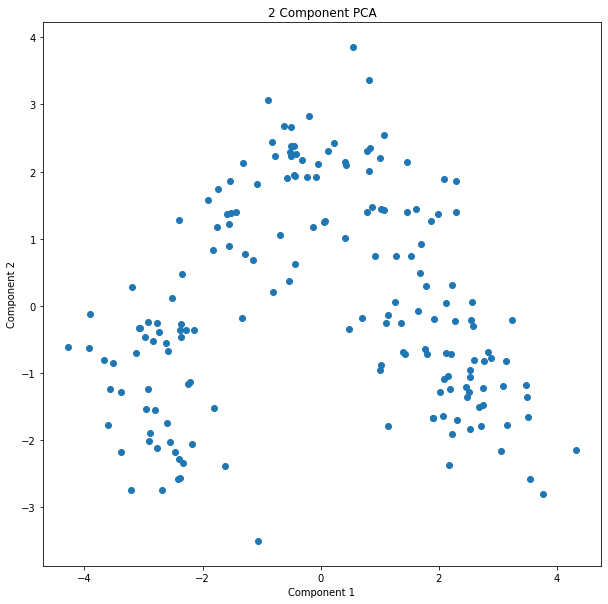

In [28]:
# Visualizing the effects of the Principal Component Analysis.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

[0.99823981 0.00160387]
[111747.11137141    179.5436153 ]


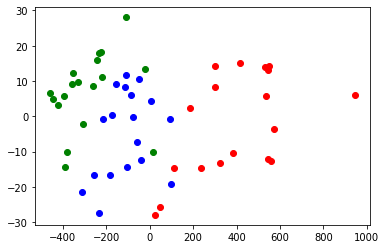

In [29]:
# Plot test data using PCA with dimentions decreased to 2D
pca2d = PCA(n_components=2) 
pca2d.fit(test_data_no_label) 
print(pca2d.explained_variance_ratio_) 
print(pca2d.explained_variance_)

test_pca_2d = pca2d.transform(test_data_no_label) 
fig2 = plt.figure() 
for i in range(len(labels)):
    if labels[i] == 1:
        c = 'r'
        target_name = 'wine 1'
    elif labels[i] == 2:
        c = 'g'
        target_name = 'wine 2'
    else:
        c = 'b'
        target_name = 'wine 3'
    plt.scatter(test_pca_2d[i, 0], test_pca_2d[i, 1],marker='o',c=c, label=target_name)
plt.show()

# 3D Principal Component Analysis

In [30]:
# Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result of the clustering.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents2 = pca.fit_transform(X)

In [31]:
principalComponents2

array([[ 2.23024297,  0.30231277, -2.03292031],
       [ 2.53192196, -1.06225676,  0.97672434],
       [ 3.75467731, -2.80530871, -0.18037013],
       [ 1.0201307 , -0.88838036,  2.02386977],
       [ 3.04919938, -2.1700067 , -0.63874711],
       [ 2.45822831, -1.20706466, -0.9882358 ],
       [ 2.06160512, -1.64048497,  0.14376754],
       [ 2.51844454, -0.96083709, -1.78237967],
       [ 2.76797089, -0.82452149, -0.98895639],
       [ 3.48916135, -1.35519047, -0.42931898],
       [ 1.76638133, -0.6467145 , -1.20222501],
       [ 2.12870494, -0.71042819, -0.88027853],
       [ 3.46649467, -1.1821256 , -1.2273527 ],
       [ 4.31363172, -2.15473286, -1.27789771],
       [ 2.30845048, -1.70092988,  0.20695688],
       [ 2.16745547, -2.36700104,  0.82621814],
       [ 1.90220844, -1.66778153,  0.78746684],
       [ 3.54012997, -2.57341412, -0.49894943],
       [ 2.09274066, -1.08886084, -0.16408621],
       [ 3.1319081 , -0.82827339, -0.35847133],
       [ 1.10804505, -0.25248228,  0.936

In [32]:
# Creating a dataframe featuring the three Principal components that we acquired through PCA.
PCA_dataset2 = pd.DataFrame(data = principalComponents2, columns = ['component3', 'component4', 'component5'] )
PCA_dataset2.head()

,component3,component4,component5
0,2.230243,0.302313,-2.032920
1,2.531922,-1.062257,0.976724
2,3.754677,-2.805309,-0.180370
3,1.020131,-0.888380,2.023870
4,3.049199,-2.170007,-0.638747


In [33]:
# Extracting the three features from above in order to add them to the dataframe.
principal_component3 = PCA_dataset2['component3']
principal_component4 = PCA_dataset2['component4']
principal_component5 = PCA_dataset2['component5']

/var/folders/v8/g6gkkl694rg09vv_x6g7ppqc0000gn/T/ipykernel_41986/2320994751.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


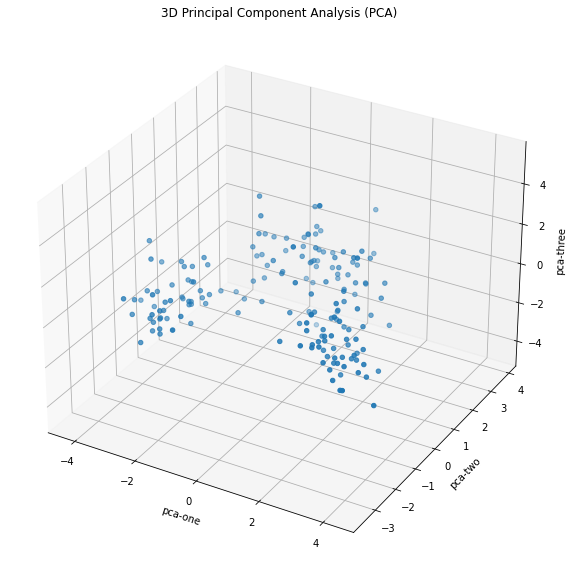

In [34]:
# Visualizing the results of the 3D PCA.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component3, 
    ys=principal_component4, 
    zs=principal_component5, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

[9.98239814e-01 1.60386772e-03 9.56601734e-05]
[1.11747111e+05 1.79543615e+02 1.07085972e+01]


/var/folders/v8/g6gkkl694rg09vv_x6g7ppqc0000gn/T/ipykernel_41986/3145253005.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig1, rect=[0, 0, 1, 1], elev=30, azim=20)


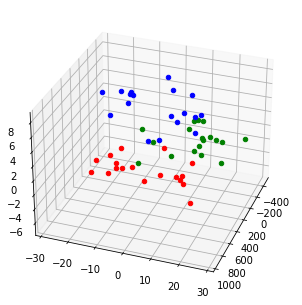

In [35]:
# Plot test data using PCA with dimentions decreased to 3D
pca = PCA(n_components=3) 
pca.fit(test_data_no_label) 
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_)

test_pca_3d = pca.transform(test_data_no_label) 
fig1 = plt.figure() 
ax = Axes3D(fig1, rect=[0, 0, 1, 1], elev=30, azim=20)
for i in range(len(labels)):
    if labels[i] == 1:
        c = 'r'
        target_name = 'wine 1'
    elif labels[i] == 2:
        c = 'g'
        target_name = 'wine 2'
    else:
        c = 'b'
        target_name = 'wine 3'
    ax.scatter(test_pca_3d[i, 0], test_pca_3d[i, 1],test_pca_3d[i, 2],marker='o',c=c, label=target_name)

# 2D T-distributed Stochastic Neighbour Embedding

In [36]:
# Implementing t-SNE.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results1 = tsne.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.001s...
[t-SNE] Computed neighbors for 177 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 1.846523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.156712
[t-SNE] KL divergence after 300 iterations: 0.341117


In [37]:
tsne_results1

array([[  6.183903  ,   6.514266  ],
       [ 10.474127  ,   8.062168  ],
       [  9.330258  ,  10.671681  ],
       [ 10.915156  ,   4.2071037 ],
       [  9.790435  ,  10.044191  ],
       [  8.194197  ,   7.5757675 ],
       [ 10.387368  ,   5.996635  ],
       [  7.883947  ,  10.547505  ],
       [  8.050135  ,   8.615164  ],
       [ 10.641069  ,   9.402958  ],
       [  8.068661  ,   6.6770453 ],
       [  8.494415  ,   7.0598807 ],
       [  9.791025  ,  11.940521  ],
       [ 10.364619  ,  11.339576  ],
       [ 10.634011  ,   6.8612957 ],
       [ 11.476932  ,   7.454349  ],
       [ 11.415117  ,   6.8363805 ],
       [ 10.998435  ,  10.2081    ],
       [  5.3298206 ,   8.457665  ],
       [  6.224229  ,   9.342549  ],
       [  4.5544324 ,   5.369895  ],
       [  7.0598907 ,   6.8378396 ],
       [  7.438588  ,   4.9138594 ],
       [  7.5667562 ,   4.467052  ],
       [ 11.454376  ,   3.5902073 ],
       [  9.02819   ,   6.4448833 ],
       [  6.478599  ,   5.6792636 ],
 

In [38]:
# Creating a dataframe featuring the two principal components that we acquired through t-SNE.
tsne_dataset1 = pd.DataFrame(data = tsne_results1, columns = ['component1', 'component2'] )
tsne_dataset1.head()

,component1,component2
0,6.183903,6.514266
1,10.474127,8.062168
2,9.330258,10.671681
3,10.915156,4.207104
4,9.790435,10.044191


In [39]:
# Extracting the two features from above in order to add them to the dataframe.
tsne_component1 = tsne_dataset1['component1']
tsne_component2 = tsne_dataset1['component2']

<Figure size 432x288 with 0 Axes>

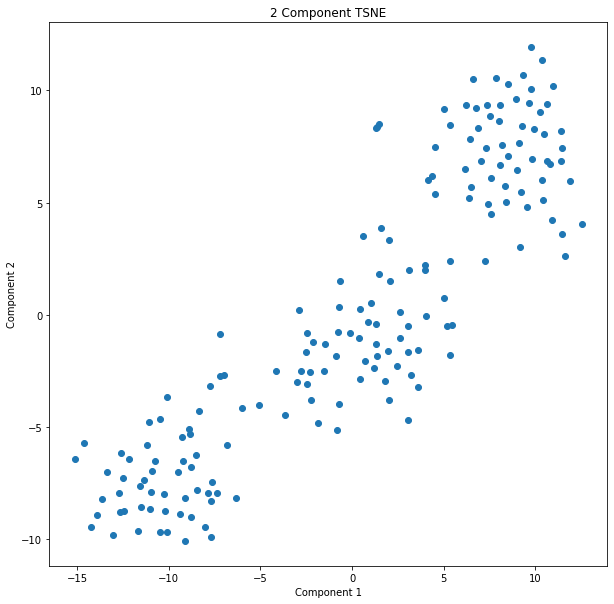

In [40]:
# Visualizing the effects of the T-distributed Stochastic Neighbour Embedding.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
plt.scatter(tsne_component1, tsne_component2)

# 3D T-distributed Stochastic Neighbour Embedding

In [41]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results2 = tsne.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.000s...
[t-SNE] Computed neighbors for 177 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 1.846523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 112.326050
[t-SNE] KL divergence after 300 iterations: 2.633116


In [42]:
tsne_results2

array([[-6.11746264e+00, -3.30481029e+00,  3.34466972e+01],
       [ 2.27151918e+00, -2.43966103e+01,  1.81785679e+01],
       [ 2.21400604e+01,  5.98660564e+00,  2.46957817e+01],
       [ 6.71092319e+00, -7.48882532e+00, -3.29634399e+01],
       [ 1.24478388e+00, -3.84489365e+01, -9.78575110e-01],
       [-1.83754883e+01, -1.67046242e+01, -2.56418724e+01],
       [ 1.04210672e+01,  6.67457390e+00,  3.07399750e+01],
       [ 3.22351761e+01, -1.21517925e+01,  1.07469664e+01],
       [ 1.17600307e+01,  2.70906181e+01, -2.32025909e+01],
       [ 1.16141357e+01, -1.75114212e+01,  2.48541870e+01],
       [ 4.27691603e+00, -3.08809452e+01, -1.52808475e+01],
       [-7.80754471e+00, -3.87698936e+01,  2.65582829e+01],
       [ 3.23221283e+01, -2.21295681e+01,  4.77509069e+00],
       [ 4.79780436e+00,  3.04230232e+01,  1.44540567e+01],
       [ 3.50532112e+01,  4.58459806e+00,  1.36661844e+01],
       [ 1.05663471e+01,  5.55652952e+00, -3.14236202e+01],
       [-2.71114120e+01, -1.56788874e+01

In [43]:
# Creating a dataframe featuring the three Principal components that we acquired through t-SNE.
tsne_dataset2 = pd.DataFrame(data = tsne_results2, columns = ['component3', 'component4', 'component5'] )
tsne_dataset2.head()

,component3,component4,component5
0,-6.117463,-3.304810,33.446697
1,2.271519,-24.396610,18.178568
2,22.140060,5.986606,24.695782
3,6.710923,-7.488825,-32.963440
4,1.244784,-38.448936,-0.978575


In [44]:
# Extracting the three features from above in order to add them to the dataframe.
tsne_component3 = tsne_dataset2['component3']
tsne_component4 = tsne_dataset2['component4']
tsne_component5 = tsne_dataset2['component5']

/var/folders/v8/g6gkkl694rg09vv_x6g7ppqc0000gn/T/ipykernel_41986/2648427008.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


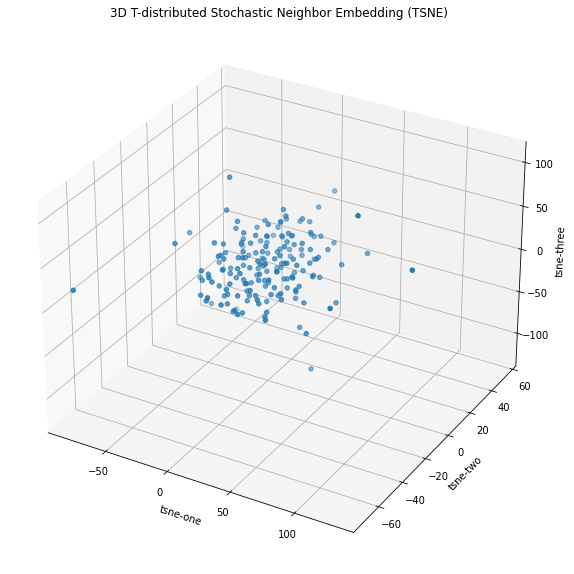

In [45]:
# Visualizing the 3D t-SNE.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D T-distributed Stochastic Neighbor Embedding (TSNE)')
ax.scatter(
    xs=tsne_component3, 
    ys=tsne_component4, 
    zs=tsne_component5, 
    #c = x_kmeans
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()